<a href="https://colab.research.google.com/github/Anyaoma/My-projects/blob/main/Kelly_Criterion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
pip install yfinance

In [20]:
import math
import numpy as np
import pandas as pd
import yfinance as yfin

In [21]:
start_date = '2018-01-01'
end_date = '2023-01-01'

In [22]:
data = pd.DataFrame(yfin.download('^GSPC', start_date, end_date))
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3397430000
2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3544030000
2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3697340000
2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3239280000
2018-01-08,2742.669922,2748.510010,2737.600098,2747.709961,2747.709961,3246160000


In [23]:
data = data['Adj Close']

In [24]:
data = pd.DataFrame(data)
data.head()

,Adj Close
Date,
2018-01-02,2695.810059
2018-01-03,2713.060059
2018-01-04,2723.989990
2018-01-05,2743.149902
2018-01-08,2747.709961


In [25]:
data['return'] = np.log(data/data.shift())
data.tail()

,Adj Close,return
Date,,
2022-12-23,3844.820068,0.005851
2022-12-27,3829.250000,-0.004058
2022-12-28,3783.219971,-0.012093
2022-12-29,3849.280029,0.017311
2022-12-30,3839.500000,-0.002544


f = mean - risk_free_rate/variance

In [26]:
mu = data['return'].mean()*252 #annualised return
mu

0.070841128688853

In [27]:
sigma = data['return'].std() * np.sqrt(252)

In [28]:
r = 0.0

In [29]:
sigma**2

0.04824161944101331

In [30]:
f = (mu - r)/sigma**2
f

1.4684649791964985

Negative 𝑓

f: A negative value for f indicates that the expected return is less than the risk-free rate or that the instrument has a negative expected return. Essentially, it suggests a net loss over time.


Implication: A negative f advises against investing in the instrument because the strategy is not profitable.

In [31]:
equity_levels = []

def kelly_criterion(f):
    global equity_levels
    equity = f'Equity_{f:.2f}'
    equity_levels.append(equity)
    cap = f'Capital{f:.2f}'
    data[equity] = 1 #total value of the portfolio
    data[cap] = data[equity] * f  #a percentage of total equity invested in each trade

    for i, t in enumerate(data.index[1:]):
        t_1 = data.index[i] #previous date
        data.loc[t,cap] = data[cap].loc[t_1] * math.exp(data['return'].loc[t])  #growth in invested capital
        data.loc[t, equity] = data[cap].loc[t] - data[cap].loc[t_1] + data[equity].loc[t_1] #update equity value
        data.loc[t,cap] = data[equity].loc[t] * f #adjust new capital value

In [32]:
kelly_criterion(f)

In [33]:
kelly_criterion(f*0.5)

In [34]:
kelly_criterion(f*0.66)

In [35]:
print(data[equity_levels].tail())

            Equity_1.47  Equity_0.73  Equity_0.97
Date                                             
2022-12-23     1.549687     1.328634     1.415791
2022-12-27     1.540472     1.324683     1.410234
2022-12-28     1.513280     1.312992     1.393804
2022-12-29     1.552082     1.329825     1.417392
2022-12-30     1.546291     1.327344     1.413902


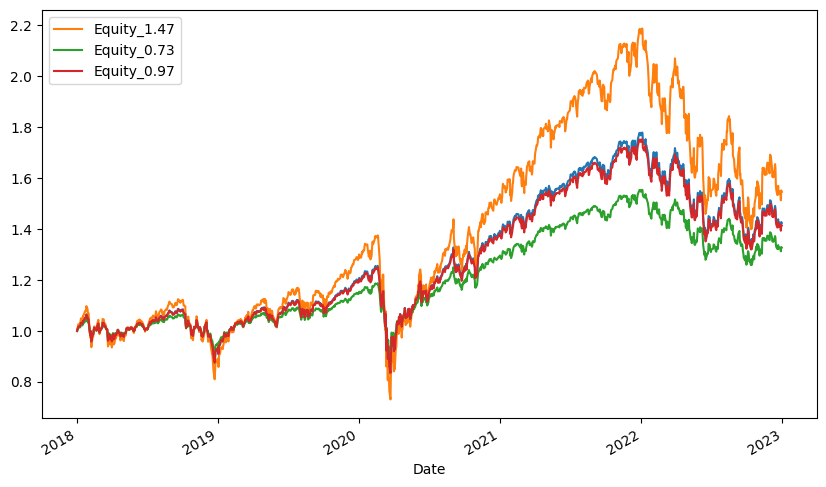

In [36]:
ax = data['return'].cumsum().apply(np.exp).plot(figsize=(10, 6))
data[equity_levels].plot(ax=ax, legend=True);


As the figure above illustrates, applying the optimal Kelly leverage leads to a
rather erratic evolution of the equity position (high volatility), which is
intuitively plausible, given the leverage ratio o1.4759. One would expect
the volatility of the equity position to increase with increasing leverage.
Therefore, practitioners often do not use “full Kelly” (4.6), but rather
“half Kelly” (2.3). In the current example, this is reduce

1/2 * f2.3
d to: